In [67]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import typing

In [4]:
stats = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }

In [8]:
def dict_to_dataframe(test_dict):
    # Az adatok alapján DataFrame létrehozása
    df = pd.DataFrame.from_dict(test_dict, orient='columns')
    return df

In [12]:
df = dict_to_dataframe(stats)

In [10]:
def get_column(test_df, column_name):
    new_df = test_df.copy()
    return new_df[column_name]

In [13]:
get_column(df, "country")

0          Brazil
1          Russia
2           India
3           China
4    South Africa
Name: country, dtype: object

In [16]:
def population_density(test_df):
    new_df = test_df.copy()
    density = new_df["population"] / new_df["area"]
    new_df["density"] = density
    return new_df

In [17]:
population_density(df)

,country,capital,area,population,density
0,Brazil,Brasilia,8.516,200.40,23.532175
1,Russia,Moscow,17.100,143.50,8.391813
2,India,New Dehli,3.286,1252.00,381.010347
3,China,Beijing,9.597,1357.00,141.398354
4,South Africa,Pretoria,1.221,52.98,43.390663


In [18]:
def plot_population(test_df):
    new_df = test_df.copy()
    fig, ax = plt.subplots()
    ax.bar(new_df['country'], new_df['population'])

    # Diagram címének és tengelycímek hozzáadása
    ax.set_title('Population of Countries')
    ax.set_xlabel('Country')
    ax.set_ylabel('Population (millions)')

    # X tengely címkék elforgatása, hogy könnyen olvashatóak legyenek
    plt.xticks(rotation=90)

    # Diagram megjelenítése
    plt.show()
    
    return fig

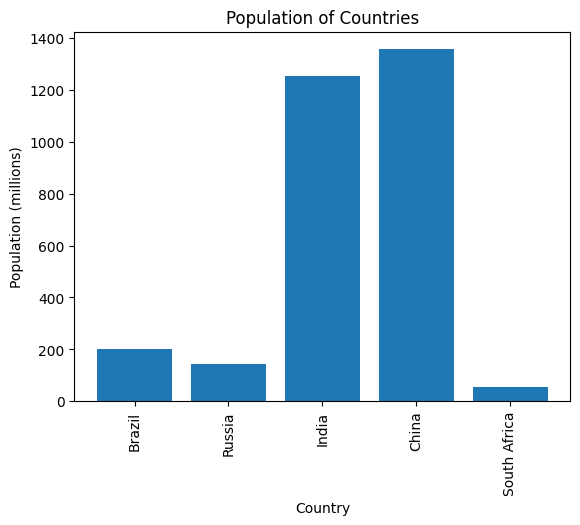

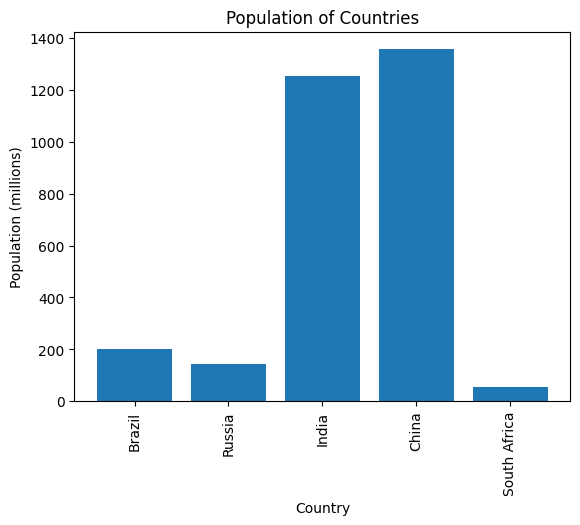

In [19]:
plot_population(df)

In [22]:
def plot_area(test_df):
    new_df = test_df.copy()
    fig, ax = plt.subplots()
    ax.pie(new_df['area'], labels=new_df['country'])
    
    ax.set_title('Area of Countries')
    
    plt.show()
    return fig

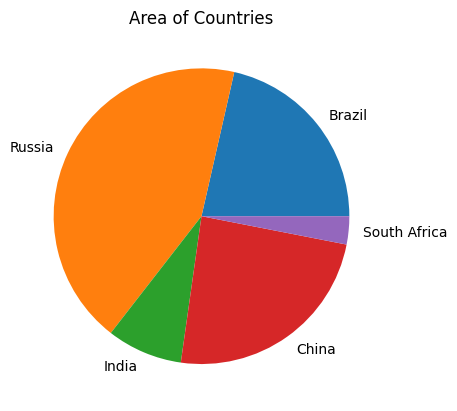

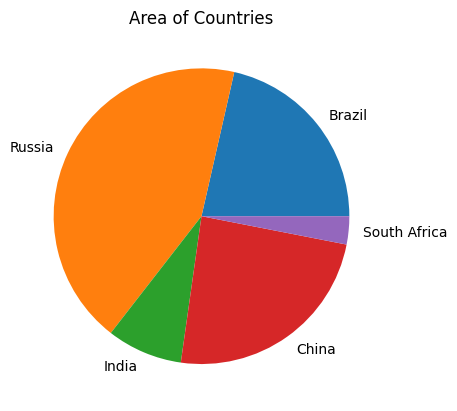

In [23]:
plot_area(df)

In [24]:
def csv_to_df(input_csv):
    df = pd.read_csv(input_csv)
    return df

In [39]:
df2 = csv_to_df("C:/Users/User\Documents\GitHub\ECOPY_23241\data\StudentsPerformance.csv")

In [40]:
def capitalize_columns(input_df):
    new_df = input_df.copy()

    # Oszlopnevek nagybetűssé alakítása, amelyek nem tartalmaznak 'e' betűt
    for column in new_df.columns:
        if 'e' not in column:
            new_df.rename(columns={column: column.upper()}, inplace=True)

    return new_df

In [41]:
capitalize_columns(df2)

,gender,race/ethnicity,parental level of education,LUNCH,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [50]:
def math_passed_count(input_df):
    new_df = input_df.copy()
    passing_score = 50

    # "math score" oszlopon alapuló szűrés, és az eredmények számolása
    passed_students = new_df[new_df['math score'] >= passing_score]
    count = passed_students.shape[0]

    return count

In [51]:
math_passed_count(df2)

865

In [53]:
def did_pre_course(input_df):
    new_df = input_df.copy()

    df_did_pre_course = new_df[new_df['test preparation course'] == "completed"]

    return df_did_pre_course  

In [54]:
did_pre_course(df2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65


In [61]:
def average_scores2(input_df):

    grouped_df = input_df.groupby('parental level of education').agg(
        math_average=('math score', 'mean'),
        reading_average=('reading score', 'mean'),
        writing_average=('writing score', 'mean')
    ).reset_index()

    return grouped_df

In [63]:
def average_scores(input_df):
    new_df = input_df.copy()
    new_df['math_average_scores'] = new_df.groupby('parental level of education')['math score'].transform('mean')
    new_df['reading_average_scores'] = new_df.groupby('parental level of education')['reading score'].transform('mean')
    new_df['writing_average_scores'] = new_df.groupby('parental level of education')['writing score'].transform('mean')
    return new_df

In [64]:
average_scores(df2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_average_scores,reading_average_scores,writing_average_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,69.389831,73.000000,73.381356
1,female,group C,some college,standard,completed,69,90,88,67.128319,69.460177,68.840708
2,female,group B,master's degree,standard,none,90,95,93,69.745763,75.372881,75.677966
3,male,group A,associate's degree,free/reduced,none,47,57,44,67.882883,70.927928,69.896396
4,male,group C,some college,standard,none,76,78,75,67.128319,69.460177,68.840708
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,69.745763,75.372881,75.677966
996,male,group C,high school,free/reduced,none,62,55,55,62.137755,64.704082,62.448980
997,female,group C,high school,free/reduced,completed,59,71,65,62.137755,64.704082,62.448980
998,female,group D,some college,standard,completed,68,78,77,67.128319,69.460177,68.840708


In [65]:
def add_age(input_df):
    new_df = input_df.copy()
    random.seed(42)
    new_df['age'] = random.randint(18, 67)
    return new_df

In [68]:
add_age(df2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,age
0,female,group B,bachelor's degree,standard,none,72,72,74,58
1,female,group C,some college,standard,completed,69,90,88,58
2,female,group B,master's degree,standard,none,90,95,93,58
3,male,group A,associate's degree,free/reduced,none,47,57,44,58
4,male,group C,some college,standard,none,76,78,75,58
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,58
996,male,group C,high school,free/reduced,none,62,55,55,58
997,female,group C,high school,free/reduced,completed,59,71,65,58
998,female,group D,some college,standard,completed,68,78,77,58


In [69]:
def female_top_score(input_df):
    new_df = input_df.copy()
    # Női diákok kiválasztása
    female_df = new_df[input_df['gender'] == 'female']

    # Legjobb teljesítményt elérő diák kiválasztása
    top_student = female_df.nlargest(1, ['math score', 'reading score', 'writing score'])

    # Eredmények kinyerése és tuple formában visszaadása
    math_score = top_student['math score'].values[0]
    reading_score = top_student['reading score'].values[0]
    writing_score = top_student['writing score'].values[0]

    return (math_score, reading_score, writing_score)

In [70]:
female_top_score(df2)

(100, 100, 100)

In [75]:
def add_grade(input_df):
    new_df = input_df.copy()
    
    def assign_grade(score):
        if score >= 0.90:
            return 5
        elif score >= 0.80:
            return 4
        elif score >= 0.66:
            return 3
        elif score >= 0.50:
            return 2
        else:
            return 1

    # 'grade' oszlop hozzáadása a DataFrame-hez
    new_df['grade'] = (new_df['math score'] + new_df['reading score'] + new_df['writing score']) / 300
    new_df['grade'] = new_df['grade'].apply(assign_grade)

    return new_df

In [76]:
add_age(df2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,age
0,female,group B,bachelor's degree,standard,none,72,72,74,58
1,female,group C,some college,standard,completed,69,90,88,58
2,female,group B,master's degree,standard,none,90,95,93,58
3,male,group A,associate's degree,free/reduced,none,47,57,44,58
4,male,group C,some college,standard,none,76,78,75,58
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,58
996,male,group C,high school,free/reduced,none,62,55,55,58
997,female,group C,high school,free/reduced,completed,59,71,65,58
998,female,group D,some college,standard,completed,68,78,77,58


In [79]:
def math_bar_plot(test_df):
    new_df = test_df.copy()
    
    average_math_score = new_df.groupby('gender')['math score'].mean()

    # Oszlopdiagram létrehozása
    fig, ax = plt.subplots()
    average_math_score.plot(kind='bar', ax=ax)

    # Diagram címének és tengelycímek hozzáadása
    ax.set_title('Average Math Score by Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Math Score')

    # Diagram megjelenítése
    plt.show()

    return fig

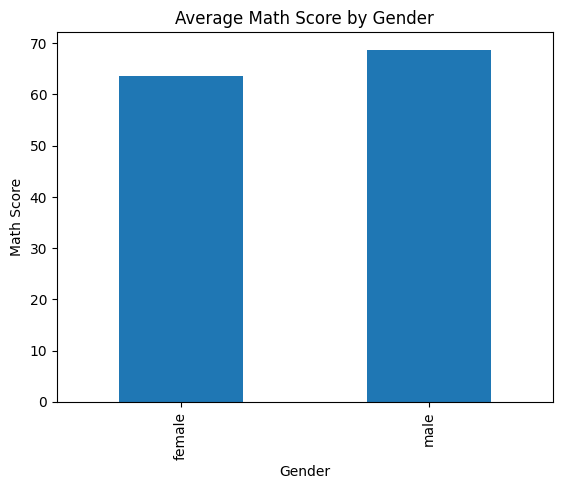

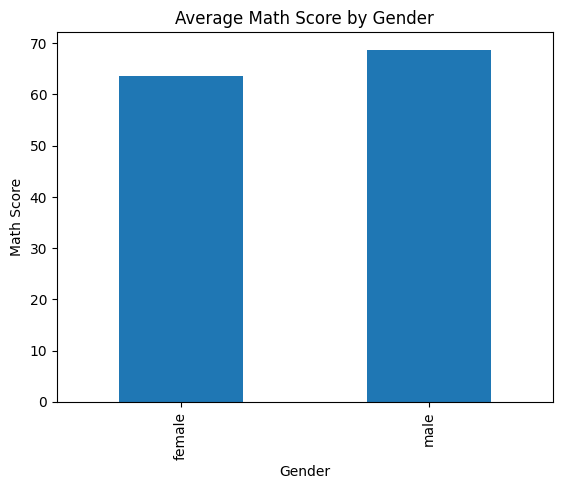

In [80]:
math_bar_plot(df2)